In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/df_main_all_features.xlsx')   
df = df.set_index('ID')
df.head(1)

,sex,age,education_lvl,education_years,depression,tds,id,chroma_cens,chroma_cqt,chroma_stft,...,spectral_rolloff_std,poly_features_std,tonnetz_std,zero_crossing_rate_std,tempogram_std,rmfourier_tempograms_std,chroma_stft_std,chroma_cqt_std,chroma_cens_std,melspectrogram_std
ID,,,,,,,,,,,,,,,,,,,,,
PD-003,1,17.0,0,10,0,0,PD-003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset = ['poly_features'])
df.info()

In [ ]:
df = df.drop(index=['PD-020', 'PD-043', 'PD-045', 'PD-046', 'PD-047', 'PD-026', 'PD-030', 'PD-054', 'PD-055', 'PD-059', 'PD-063', 'PD-065', 'PD-067', 'PD-068', 'PD-070',
                    'PD-071', 'PD-074', 'PD-075', 'PD-076', 'PD-079', 'PD-080', 'PD-081', 'PD-082'])

In [ ]:
df.tds.value_counts()

0    51
1     6
Name: tds, dtype: int64

In [ ]:
X = df.drop(['tds', 'depression', 'chroma_cens', 'chroma_cqt', 'id', 'chroma_stft',
    'melspectrogram', 'mfcc', 'poly_features', 'rmfourier_tempograms', 'rms', 'spectral_bandwidth', 'spectral_centroid',
    'spectral_contrast', 'spectral_flatness', 'spectral_rolloff', 'tempogram', 'tonnetz', 'zero_crossing_rate', 'mfcc_avg',
    'rms_avg', 'rmfourier_tempograms_avg'], axis=1) # Features
y = df.tds # Target variable

In [ ]:
X.info()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

**Logreg**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=3000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         1

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['recall', 'accuracy', 'f1']
scores = cross_validate(logreg, X, y, scoring=scoring)
scores

{'fit_time': array([0.41729188, 0.21903539, 0.3631618 , 0.05960274, 0.31193995]),
 'score_time': array([0.00573397, 0.00757003, 0.00532293, 0.00394249, 0.003613  ]),
 'test_recall': array([0. , 0.5, 0. , 0. , 0. ]),
 'test_accuracy': array([0.5       , 0.75      , 0.72727273, 0.90909091, 0.81818182]),
 'test_f1': array([0. , 0.4, 0. , 0. , 0. ])}

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.00      0.00      0.00         1

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96      0.94        23

0.9565217391304348


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_validate(clf, X, y, scoring=scoring)

{'fit_time': array([0.09943962, 0.08375263, 0.0849421 , 0.08370876, 0.08842039]),
 'score_time': array([0.01046515, 0.01009321, 0.01042151, 0.01001287, 0.01037574]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_accuracy': array([0.83333333, 0.83333333, 0.90909091, 0.81818182, 0.90909091]),
 'test_f1': array([0., 0., 0., 0., 0.])}

**Support Vector Machine**

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.00      0.00      0.00         1

    accuracy                           0.87        23
   macro avg       0.48      0.45      0.47        23
weighted avg       0.91      0.87      0.89        23

0.8695652173913043


In [ ]:
cross_validate(clf, X, y, scoring=scoring)

{'fit_time': array([0.47122598, 0.30299783, 0.03392553, 0.02687502, 0.43245721]),
 'score_time': array([0.00404048, 0.00380826, 0.00470781, 0.00405002, 0.00319171]),
 'test_recall': array([1. , 0.5, 1. , 0. , 0. ]),
 'test_accuracy': array([0.83333333, 0.66666667, 0.72727273, 0.81818182, 0.72727273]),
 'test_f1': array([0.5       , 0.33333333, 0.4       , 0.        , 0.        ])}

**MLP**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9130434782608695


In [ ]:
print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.00      0.00      0.00         1

    accuracy                           0.91        23
   macro avg       0.48      0.48      0.48        23
weighted avg       0.91      0.91      0.91        23

0.9130434782608695


**Lets clean our feature-list according to the chart**

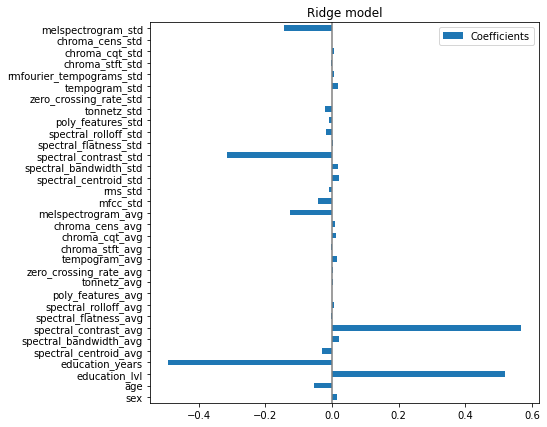

In [ ]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   logreg.coef_.T,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [ ]:
coefs.apply(lambda x: abs(x)).sort_values(by='Coefficients', ascending=False).head(11)

,Coefficients
spectral_contrast_avg,0.566649
education_lvl,0.519038
education_years,0.493082
spectral_contrast_std,0.315672
melspectrogram_std,0.143789
melspectrogram_avg,0.127209
age,0.054750
mfcc_std,0.041763
spectral_centroid_avg,0.029989
tonnetz_std,0.020392


In [ ]:
feature_cols = ['spectral_contrast_avg', 'education_lvl', 'education_years',  'spectral_contrast_std', 'melspectrogram_std', 'melspectrogram_avg', 'mfcc_std', 'spectral_centroid_avg', 'tonnetz_std',
                'spectral_bandwidth_avg']
X1 = X[feature_cols]
y = df.tds # Target variable

**Logreg clean**

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=16)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=3000)
logreg.fit(X_train1, y_train)
y_pred = logreg.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.50      1.00      0.67         1

    accuracy                           0.96        23
   macro avg       0.75      0.98      0.82        23
weighted avg       0.98      0.96      0.96        23

0.9565217391304348


In [ ]:
cross_validate(logreg, X, y, scoring=scoring)

{'fit_time': array([0.27971458, 0.19390893, 0.23375726, 0.05642653, 0.39437079]),
 'score_time': array([0.00421762, 0.00356245, 0.00401926, 0.00375509, 0.00400782]),
 'test_recall': array([0. , 0.5, 0. , 0. , 0. ]),
 'test_accuracy': array([0.5       , 0.75      , 0.72727273, 0.90909091, 0.81818182]),
 'test_f1': array([0. , 0.4, 0. , 0. , 0. ])}

**Random forest clean**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train1, y_train)
y_pred = clf.predict(X_test1)

In [ ]:
print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.00      0.00      0.00         1

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96      0.94        23

0.9565217391304348


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_validate(clf, X, y, scoring=scoring)

{'fit_time': array([0.09433126, 0.10400009, 0.09909701, 0.09650087, 0.10326529]),
 'score_time': array([0.01690841, 0.01421547, 0.01070404, 0.01253319, 0.01064634]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_accuracy': array([0.91666667, 0.83333333, 0.90909091, 0.81818182, 0.90909091]),
 'test_f1': array([0., 0., 0., 0., 0.])}

**MLP clean**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train1)
X_testscaled=sc_X.transform(X_test1)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9130434782608695


In [ ]:
print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.33      1.00      0.50         1

    accuracy                           0.91        23
   macro avg       0.67      0.95      0.73        23
weighted avg       0.97      0.91      0.93        23

0.9130434782608695


In [ ]:
cross_validate(clf, X, y, scoring=scoring)

{'fit_time': array([0.13342381, 0.08122683, 0.04632664, 0.04288101, 0.09404755]),
 'score_time': array([0.00433493, 0.00903988, 0.0045023 , 0.00421238, 0.00436831]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_accuracy': array([0.58333333, 0.83333333, 0.90909091, 0.90909091, 0.90909091]),
 'test_f1': array([0., 0., 0., 0., 0.])}

**Support Vector Machine Clean**

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train1, y_train)
y_pred = clf.predict(X_test1)

In [ ]:
print(classification_report(y_test, y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.50      1.00      0.67         1

    accuracy                           0.96        23
   macro avg       0.75      0.98      0.82        23
weighted avg       0.98      0.96      0.96        23

0.9565217391304348


In [ ]:
cross_validate(clf, X, y, scoring=scoring)

{'fit_time': array([0.46429944, 0.29707241, 0.03374243, 0.02259111, 0.44994378]),
 'score_time': array([0.00415444, 0.00382066, 0.00410795, 0.00392747, 0.0038712 ]),
 'test_recall': array([1. , 0.5, 1. , 0. , 0. ]),
 'test_accuracy': array([0.83333333, 0.66666667, 0.72727273, 0.81818182, 0.72727273]),
 'test_f1': array([0.5       , 0.33333333, 0.4       , 0.        , 0.        ])}

In [ ]:
df = pd.read_excel('/content/dataframe_features_part1.xlsx')   
df.head(1)

,id,mfcc,rms,spectral_bandwidth,spectral_centroid
0,PN-001,[[-4.2090518e+02 -4.1795706e+02 -4.1681949e+02...,[[0.00281481 0.0030643 0.00320054 ... 0.00176...,[[2282.5480437 2286.29200883 2188.82044914 .....,[[1939.71990394 2097.18418387 2023.85706612 .....


In [ ]:
df.mfcc.loc[0]

'[[-4.2090518e+02 -4.1795706e+02 -4.1681949e+02 ... -4.4962762e+02\n  -4.5417838e+02 -4.5316531e+02]\n [ 8.1351097e+01  8.2413574e+01  8.4944420e+01 ...  7.2280846e+01\n   6.7743637e+01  6.6557884e+01]\n [ 4.4983715e-02 -6.6028509e+00 -6.7538242e+00 ...  2.5326290e+01\n   2.5615200e+01  2.5945168e+01]\n ...\n [ 1.9838735e+00  1.9422665e+00  6.4676481e-01 ... -2.0345259e+00\n  -7.3707871e+00 -9.4360008e+00]\n [ 7.8509369e+00  5.8000584e+00  4.7093377e+00 ... -4.1411486e+00\n  -6.7274680e+00 -6.0570002e+00]\n [ 6.6103106e+00  5.5401816e+00  4.6622686e+00 ... -5.5795817e+00\n  -8.5120459e+00 -7.5306969e+00]]'